# Analysing the basement data to predict house prices

### Pre-process data

In [91]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [92]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error
from math import sqrt

In [93]:
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [94]:
df = pd.read_csv(data)

In [95]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
main_df = df[['Id', "SalePrice", "OverallQual", "OverallCond", "LotArea", "YearBuilt", "Street", "LotShape"]]

In [97]:
main_df.head()

,Id,SalePrice,OverallQual,OverallCond,LotArea,YearBuilt,Street,LotShape
0,1,208500,7,5,8450,2003,Pave,Reg
1,2,181500,6,8,9600,1976,Pave,Reg
2,3,223500,7,5,11250,2001,Pave,IR1
3,4,140000,7,5,9550,1915,Pave,IR1
4,5,250000,8,5,14260,2000,Pave,IR1


### Analysis

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

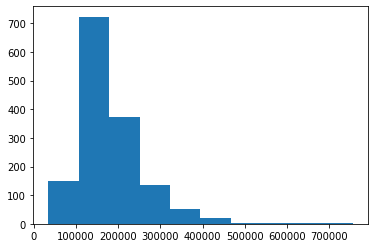

In [98]:
plt.hist(main_df["SalePrice"])

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

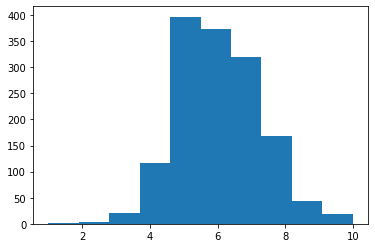

In [99]:
plt.hist(main_df["OverallQual"])

In [100]:
main_df.corr()["SalePrice"]

Id            -0.021917
SalePrice      1.000000
OverallQual    0.790982
OverallCond   -0.077856
LotArea        0.263843
YearBuilt      0.522897
Name: SalePrice, dtype: float64

In [101]:
main_df = main_df.drop(["Id"], axis = 1)

### CatBoost

In [102]:
X = main_df.drop(["SalePrice"], axis = 1)
y = main_df[["SalePrice"]]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [104]:
category = ["OverallQual", "OverallCond", "YearBuilt", "Street", "LotShape"]

In [105]:
cat_boost = CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
cat_boost.fit(X_train, y_train, cat_features=category)

0:	learn: 74545.4246818	total: 1.56ms	remaining: 76.7ms
1:	learn: 70922.0986641	total: 4.92ms	remaining: 118ms
2:	learn: 67998.5409003	total: 6.58ms	remaining: 103ms
3:	learn: 64907.8683732	total: 7.82ms	remaining: 89.9ms
4:	learn: 61918.2379738	total: 9.15ms	remaining: 82.4ms
5:	learn: 59345.6333653	total: 10.3ms	remaining: 75.4ms
6:	learn: 56977.9188050	total: 11.4ms	remaining: 70.1ms
7:	learn: 54748.8206044	total: 12.1ms	remaining: 63.6ms
8:	learn: 52964.0486945	total: 15ms	remaining: 68.2ms
9:	learn: 51347.1323650	total: 16.3ms	remaining: 65.1ms
10:	learn: 50268.7230737	total: 17.4ms	remaining: 61.8ms
11:	learn: 49328.4215602	total: 18.6ms	remaining: 59ms
12:	learn: 48386.1348226	total: 19.7ms	remaining: 56.1ms
13:	learn: 47420.5165274	total: 20.5ms	remaining: 52.7ms
14:	learn: 46607.2420092	total: 21.3ms	remaining: 49.7ms
15:	learn: 45838.1108704	total: 22.1ms	remaining: 46.9ms
16:	learn: 45248.7269286	total: 22.8ms	remaining: 44.2ms
17:	learn: 44801.9875450	total: 23.7ms	remainin

In [106]:
y_pred = cat_boost.predict(X_test)

In [107]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,200713.583163
1,133000,151307.474752
2,110000,122240.560209
3,192000,201454.880809
4,88000,132461.589263


In [108]:
## We should also look at RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

44971.99008542849

In [109]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.06633036885756415

In [110]:
main_df.drop(["SalePrice"], axis = 1).columns.values

array(['OverallQual', 'OverallCond', 'LotArea', 'YearBuilt', 'Street',
       'LotShape'], dtype=object)

In [111]:
list(cat_boost.get_feature_importance(Pool(X_test, label = y_test, cat_features=category)))

[75.20548379349935,
 0.6341694699594547,
 20.82214036371604,
 2.020980731221132,
 0.0005948072986689341,
 1.316630834305324]

#### Overall Qual is largest predictor, with LotArea being very important as well